<a href="https://colab.research.google.com/github/paaularb/tcc_mba_usp_predict_rent/blob/main/notebook/analise_exploratoria_predict_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pycaret==2.3.10

In [2]:
import pandas as pd
import pycaret 

In [3]:
df = pd.read_csv('https://github.com/paaularb/tcc_mba_usp_predict_rent/blob/main/data/sao-paulo-properties-april-2019.csv?raw=true', sep = ',')
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [4]:
df.shape

(13640, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [6]:
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


Hipoteses:

- imoveis com suites são mais caros
- imoveis com piscinas são mais caros
- imoveis mobiliados são mais caros

Ideias:
- limpar 'São Paulo' da coluna district
- dropar latitude e longitude
- renomear colunas para portugues

In [7]:
#from pycaret.classification import *
#s = setup(df, target = 'Price')

In [8]:
#best = compare_models()

passos:
- explicar problema
- passo a passo de como cheguei aqui
- explicar pq é supervisionado
- primeira conclusão: problema de classificação e qual modelo vou usar
- descrever a exprimentação: treinar modelo com os 3 primeiros classificados com o pycaret  e verificar as métricas (escolher duas ou tres)
- modelo escolhido
- features importnce
- conclusao

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [10]:
df_corr = df.corr()

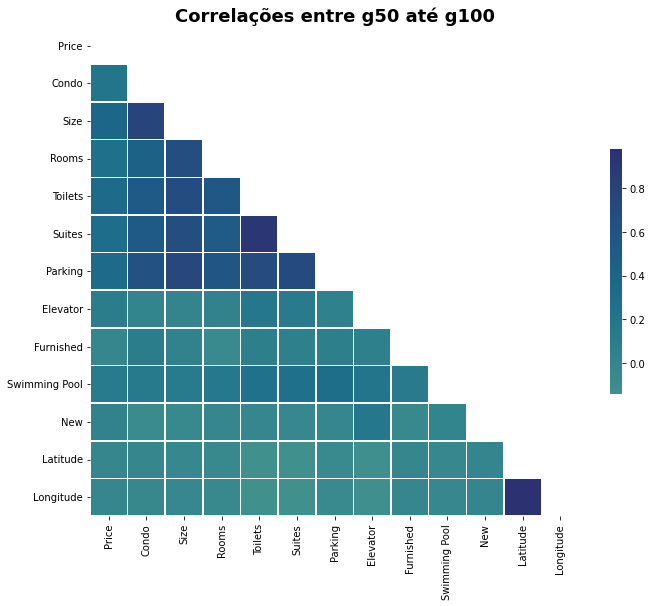

In [11]:
import seaborn              as sns
import matplotlib
import matplotlib.pyplot    as plt
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlações entre g50 até g100',fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.show()
     

In [12]:
df_x = df.drop(['Price', 'District', 'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'], axis=1) # dropar colunas


In [13]:
df_x

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
0,220,47,2,2,1,1,0,0,0,0
1,148,45,2,2,1,1,0,0,0,0
2,100,48,2,2,1,1,0,0,0,0
3,200,48,2,2,1,1,0,0,0,0
4,410,55,2,2,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13635,420,51,2,1,0,1,0,0,0,0
13636,630,74,3,2,1,2,0,0,1,0
13637,1100,114,3,3,1,1,0,0,1,0
13638,48,39,1,2,1,1,0,1,1,0


In [14]:
SEED = 10

x = df_x # dados que quero treinar
y = df['Price'] # dados que quero prever

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)

In [ ]:
model_rl = LogisticRegression(max_iter=1000)
model_rl.fit(x_train, y_train)
y_predict=model_rl.predict(x_test)

In [ ]:
model_rl.score(x_test, y_test)*100

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Classification metrics--> \n', classification_report(y_test,y_predict))